In [15]:
import bayesopt
import numpy as np
from functools import partial

import matplotlib.pyplot as plt

In [16]:
def f(x):
    return -x*np.sin(x)

In [19]:
# %%timeit
BO = bayesopt.BayesOpt(f=f,
                       initial_input=np.array([0.]),
                       acq=bayesopt.acquisition.LCB,
                       acq_optim=partial(bayesopt.acquisition_optimizer.AcquisitionSLSQPOptimizer,
                                         bounds=np.array([0,18])))
BO.run_optim(50)

BayesOpt: 100%|██████████| 50/50 [00:09<00:00,  5.30it/s, param:[8.02040291], value:-7.909592309920059, current best param:[14.20486216], current best_value:-14.17232668395356]  


# GPyOpt

In [8]:
import GPyOpt

In [27]:
bounds = [{'name': 'x1', 'type': 'continuous', 'domain': (0,18)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, X=np.array([[0.]]),domain=bounds,acquisition_type='LCB')
myBopt.run_optimization(max_iter=50)

## vs

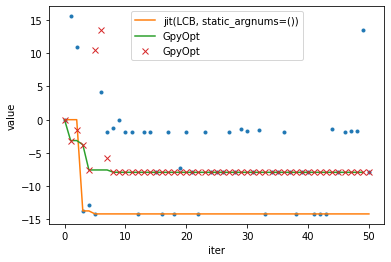

In [28]:
bayesopt.plot_history(BO)
# plt.yscale('log')
plt.plot([np.min(myBopt.Y[:i+1]) for i in range(50)],label='GpyOpt')
plt.plot(myBopt.Y,'x',label='GpyOpt')
plt.legend()

# Speed test


In [38]:
%%timeit
BO = bayesopt.BayesOpt(f=f,
                       initial_input=np.array([0.]),
                       acq=bayesopt.acquisition.LCB,
                       acq_optim=partial(bayesopt.acquisition_optimizer.AcquisitionSLSQPOptimizer,
                                         bounds=np.array([0,18])))
BO.run_optim(50)

BayesOpt: 100%|██████████| 50/50 [00:06<00:00,  7.74it/s, param:[7.96608741], value:-7.916082095845288, current best param:[14.20874219], current best_value:-14.172361916852243]  

6.73 s ± 445 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%%timeit
bounds = [{'name': 'x1', 'type': 'continuous', 'domain': (0,18)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, X=np.array([[0]]),domain=bounds,acquisition_type='LCB')
myBopt.run_optimization(max_iter=50)

18.8 s ± 760 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


2.7934621099554233